### Perceptrón
#### Equipo No. 6: Elena Villalobos Nolasco, Carolina Acosta Tovany y Aide Jazmín González Cruz

#### 1.- Se importan los paquetes

In [500]:
import random
import matplotlib.pyplot as plt
import csv
import numpy as np
from colorama import Fore, Back, Style

#### 2.- Se crea la clase perceptron con las funciones a utilizar

In [501]:
class Perceptron:
    def __init__(self, n_pesos, clase):
        self.n_pesos = n_pesos
        #Se inician pesos en 0
        self.pesos = np.array([0.0, 0.0, 0.0, 0.0])
        #Se inician teta0 en 0
        self.teta_0 = np.array([0.0])
        #Se determina el valor de 1 y -1 para las clase
        self.val_clase = { clase[0]:1, clase[1]:-1 }

    def predice(self, datos):
        #Se obtienen los atributos (en este caso son 4: ancho y alto del sepalo, así como del petalo)
        atributos_x = datos[:self.n_pesos-1]
        #Valida esta parte ØTx(i)+Ø0 = y(i)
        suma_pesos = sum([i*j for i,j in zip(self.pesos[0:self.n_pesos],atributos_x)] + self.teta_0)       
        return 1 if suma_pesos >= 0 else -1

    def ajusta_pesos(self, clase_real, data):
        self.teta_0 = self.teta_0 + clase_real
        for i in range(0,4):
            self.pesos[i] = self.pesos[i] + clase_real * data[i]

    def entrenamiento(self, n, T):
        # Se crea arreglo para guardar los pesos que se van calculando
        grad_pesos = [self.pesos]
        tets = [self.teta_0]
        for t in range(T):
            for i in n:
                clase_real = self.val_clase[i[len(i)-1]]#Se guarda la clase real de esa observación yi    
                #Se obtienen los atributos (en este caso son 4: ancho y alto del sepalo, así como del petalo)
                atributos_x = i[:self.n_pesos-1]
                suma_pesos = self.val_clase[i[len(i)-1]] * ((np.dot(np.array(self.pesos),np.array(atributos_x).transpose())) + self.teta_0)
                #print(suma_pesos)
                if suma_pesos <= 0:
                    self.ajusta_pesos(clase_real,i)
                    grad_pesos = np.concatenate((grad_pesos,[self.pesos]), axis = 0)
                    tets = np.concatenate((tets,[self.teta_0]), axis = 0)
                    
        valores = np.c_[ grad_pesos, tets ]
        return valores

    def verify(self, data):
        count = 0
        for datum in data:
            clase_real = self.val_clase[datum[len(datum)-1]]
            prediccion = self.predice(datum)
            if clase_real != prediccion:
                count = count + 1
        return (1-count/len(data))*100

#### 3.- Se crea la función principal para cargar datos, llamar y ejecutar el perceptron

In [521]:
def read_csv(file):
    with open(file,'r') as f:
        reader = csv.reader(f)
        info = []
        for row in reader:
             info.append(row)

        for datum in info:
            for i in range(len(info[0])-1):
                datum[i] = float(datum[i])
    return info


def main():
    #Cargando datos
    data = read_csv('iris.csv')
    data_iris_setosa = data[0:50]
    data_iris_no_setosa = data[50:150]

    data_with_two_species = data_iris_setosa + data_iris_no_setosa
    clases = ['setosa', 'no_setosa']
    
    #Reordenando datos aleatoriamente
    random.shuffle(data_with_two_species)

    #Datos de entrenamiento
    datos_entrenamiento = data_with_two_species[0:80]
    
    #Datos de verificación
    data_validacion = data_with_two_species[:-20]
    
    #Perceptron
    perceptron = Perceptron(len(data[0]), clases)

    #Entrenando
    x = perceptron.entrenamiento(datos_entrenamiento, T=1000)
    print('\n Pesos Finales: {}'.format(perceptron.pesos))
   
    #print(x)
    
    plt.plot(x[:,0],'k')#peso1
    plt.plot(x[:,1],'r')#peso2
    plt.plot(x[:,2],'b')#peso3
    plt.plot(x[:,3],'g')#peso4
    plt.plot(x[:,4],'y')#teta_0

    plt.show()
    
    print(Fore.BLACK + 'Peso 1')
    print(Fore.RED + 'Peso 2')
    print(Fore.BLUE + 'Peso 3')
    print(Fore.GREEN + 'Peso 4')
    print(Fore.YELLOW + 'Teta 0')
    
    #Verificación
    accuracy = perceptron.verify(data_validacion)
    print(Fore.RED + '\n\nError: {0:10.2f} % en datos de verificación'.format(100-accuracy)) 
    print('\n\n') 

### 4. Ejecutando el perceptrón y gráficando pesos


 Pesos Finales: [ 2.1  4.1 -6.6 -3.4]


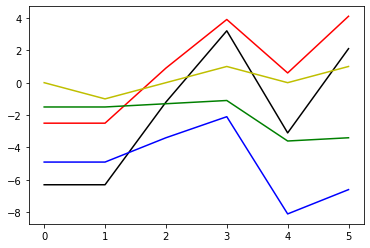

Peso 1
Peso 2
Peso 3
Peso 4
Teta 0


Error:       0.77 % en datos de verificación





In [523]:
  main()